===========================================


Title: 3.2 Exercises


Author: Chad Wood


Date: 16 Dec 2021


Modified By: Chad Wood


Description: This program demonstrates the use of data wrangling techniques to better visualize data.


=========================================== 

## US Population Growth

For this problem, you will be using the data set us pop data.csv. This data is from taken from the US Census has the US population every ten years from 1790 to 2010.
1. Import the data and create two new columns. Create one column that is the number of years since 1790. Create another column that is the population in millions.


In [1]:
import pandas as pd

popUS = pd.read_csv('week3data/us_pop_data.csv')

In [2]:
popUS['years'] = popUS.year - 1790
popUS['pop_millions'] = popUS.us_pop / 1000000

popUS.head()

,year,us_pop,years,pop_millions
0,1790,3929326,0,3.929326
1,1800,5308483,10,5.308483
2,1810,7239881,20,7.239881
3,1820,9638453,30,9.638453
4,1830,12866020,40,12.866020


2. Plot the US population (in millions) versus the years since 1790.

Text(0.5, 1.0, 'US Population Growth')

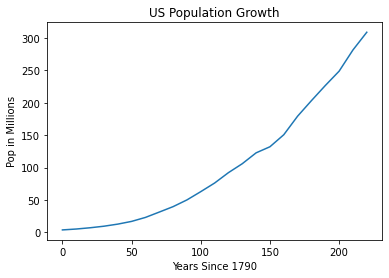

In [3]:
import matplotlib.pyplot as plt

plt.plot(popUS.years, popUS.pop_millions)

plt.xlabel('Years Since 1790')
plt.ylabel('Pop in Millions')
plt.title('US Population Growth')

3. Create a linear regression model to predict the US population (in millions) to years from 1790. Find and report the R2-value of this model.

In [5]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [9]:
pop = np.array(popUS.pop_millions)

In [76]:
years = np.array(popUS.years).reshape((-1,1))

# Builds the linear regression model
model = LinearRegression().fit(years, pop)

# Returns R^2
r_sq = model.score(years, pop)
print('Coefficient of Determination:', r_sq, '\n')

# Returns first 5 values in regression y-values
pd.DataFrame(model.predict(years)).head()

Coefficient of Determination: 0.9192437447080442 



,0
0,-45.567876
1,-31.971628
2,-18.375379
3,-4.779131
4,8.817117


4. Create another new column in your data by squaring the number of years since 1790.

In [14]:
popUS['years_sq'] = popUS.years**2
popUS.head(5)

,year,us_pop,years,pop_millions,years_sq
0,1790,3929326,0,3.929326,0
1,1800,5308483,10,5.308483,100
2,1810,7239881,20,7.239881,400
3,1820,9638453,30,9.638453,900
4,1830,12866020,40,12.866020,1600


5. Run another linear regression, where your input feature is the square of the number of years since 1790. Find and report the R2-value of this model.

In [77]:
years_sq = np.array(popUS.years_sq).reshape((-1,1))

# Builds the linear regression model
model = LinearRegression().fit(years_sq, pop)

# Returns R^2
r_sq = model.score(years_sq, pop)
print('Coefficient of Determination:', r_sq, '\n')

# Returns first 5 values in regression y-values
pd.DataFrame(model.predict(years_sq)).head()

Coefficient of Determination: 0.9984915694986646 



,0
0,1.360410
1,1.982413
2,3.848421
3,6.958435
4,11.312454


6. Plot the models you built on top of the data. Which one fits the data better? Is this apparent in your R2-values. Explain.

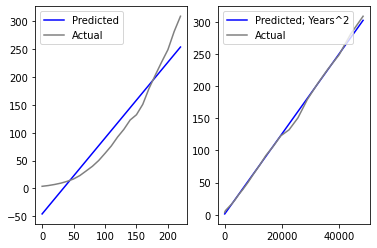

In [33]:
# Create two subplots
f, (ax1, ax2) = plt.subplots(1, 2)

# Builds the linear regression model; plots subplot
model = LinearRegression().fit(years, pop)

ax1.plot(years, model.predict(years), color='blue', label='Predicted')
ax1.plot(years, pop, color='grey', label='Actual')
ax1.legend()

# Builds the linear regression model; plots subplot
model = LinearRegression().fit(years_sq, pop)

ax2.plot(years_sq, model.predict(years_sq), color='blue', label='Predicted; Years^2')
ax2.plot(years_sq, y, color='grey', label='Actual')
ax2.legend()

    Linear regression lines are not good fits for exponential data, such as what's typically seen with population data. By squaring the years, we converted the years data from linear distribution to exponential distribution, and then built our regression model from that. This created a much better fit to our population data. This is also present in r^2 which represents a more perfect match the closer to 1 it is.

## Customer Spending Data

For this problem, you will be using the data set customer spending.csv. This data set is modified
version of the data from https://archive.ics.uci.edu/ml/datasets/Wholesale+customers.
1. Make a histogram of the customer spending amounts.

In [34]:
spending = pd.read_csv('week3data/customer_spending.csv')

In [58]:
import math

# Uses The Freedman-Diaconis rule to determine bin count
iqr = np.subtract(*np.percentile(spending, [75, 25]))
bin_width = 2 * iqr / len(spending)**(1/3)
num_bins = (spending.max() - spending.min()) / bin_width

# Rounds up
num_bins = math.ceil(n_bins)

7122.34375

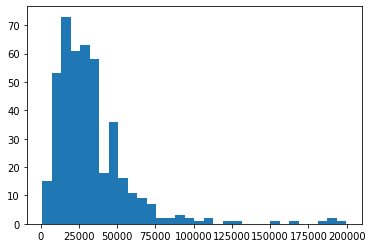

In [68]:
plt.hist(spending, bins=num_bins)[1][1]

2. Make a new data set that is a log transformation of the customer spending amounts.

In [60]:
log_spending = np.log(spending)
log_spending.head()

,ann_spending
0,10.437405
1,10.412291
2,10.508077
3,10.217605
4,10.738568


3. Make a histogram of the log transformed dataset.

6.975538677160036

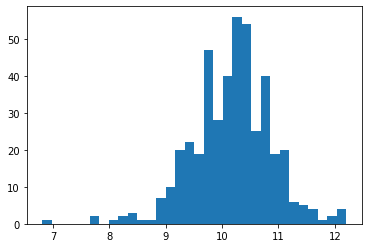

In [66]:
plt.hist(log_spending, bins=num_bins)[1][1]

4. Compare the two histograms. Discuss why it might be useful to apply a log transformation to this data for modeling purposes.

    The original data contained a heavy positive skew due to outliers. Since logarithmic calculations are a good method of dealing with right skewness in some cases, it's useful for better modelling the data because it achieves a result closer to the standard curve without biasing the data.